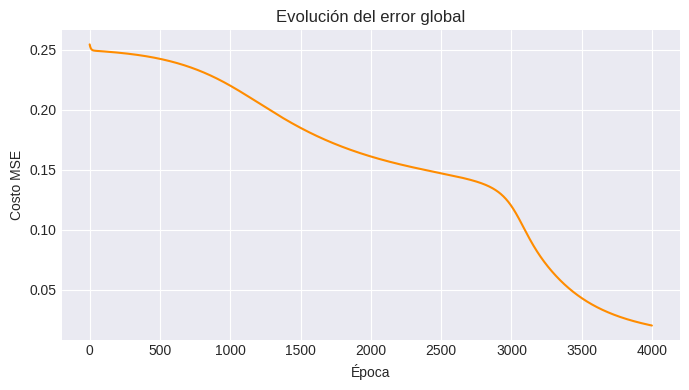

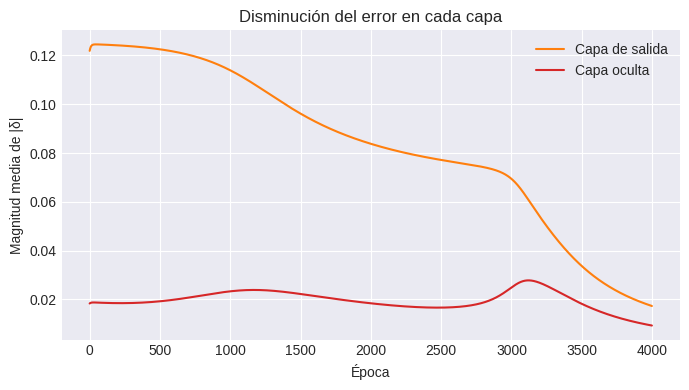

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Funciones auxiliares ----------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(a):
    """Derivada usando la salida de la sigmoide."""
    return a * (1 - a)

# ---------- Dataset XOR ----------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)
y = np.array([[0],
              [1],
              [1],
              [0]], dtype=float)

# ---------- Arquitectura (2-2-1) ----------
np.random.seed(0)
input_size  = 2
hidden_size = 2
output_size = 1

W1 = np.random.randn(input_size, hidden_size) * 0.5
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.5
b2 = np.zeros((1, output_size))

lr     = 0.5     # tasa de aprendizaje
epochs = 4000     # iteraciones de entrenamiento

# ---------- Históricos ----------
cost_history         = []
delta_hidden_history = []
delta_out_history    = []

# ---------- Entrenamiento ----------
for epoch in range(epochs):
    # --- Forward pass ---
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)              # predicciones (salida)

    # --- Costo (MSE) ---
    cost = np.mean((y - a2) ** 2)
    cost_history.append(cost)

    # --- Backpropagation ---
    delta2 = (a2 - y) * sigmoid_deriv(a2)        # capa de salida
    delta1 = (delta2 @ W2.T) * sigmoid_deriv(a1) # capa oculta

    # Gradientes
    dW2 = a1.T @ delta2 / len(X)
    db2 = delta2.mean(axis=0, keepdims=True)
    dW1 = X.T @ delta1 / len(X)
    db1 = delta1.mean(axis=0, keepdims=True)

    # Actualización de pesos y sesgos
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    # Registrar magnitud media de |δ| por capa
    delta_out_history.append(np.abs(delta2).mean())
    delta_hidden_history.append(np.abs(delta1).mean())

# ---------- Gráficas ----------
plt.style.use('seaborn-v0_8-darkgrid')

# 1) Costo global MSE
plt.figure(figsize=(7,4))
plt.plot(cost_history, color='darkorange')
plt.xlabel('Época')
plt.ylabel('Costo MSE')
plt.title('Evolución del error global')
plt.tight_layout()
plt.show()

# 2) Errores por capa
plt.figure(figsize=(7,4))
plt.plot(delta_out_history,   label='Capa de salida', color='tab:orange')
plt.plot(delta_hidden_history,label='Capa oculta',    color='tab:red')
plt.xlabel('Época')
plt.ylabel('Magnitud media de |δ|')
plt.title('Disminución del error en cada capa')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
print(f"Costo MSE en la época 4000: {cost_history[-1]:.4f}")

Costo MSE en la época 4000: 0.0202


In [8]:
print(f"Magnitud media de |δ| en la época 4000 (capa de salida): {delta_out_history[-1]:.4f}")
print(f"Magnitud media de |δ| en la época 4000 (capa oculta): {delta_hidden_history[-1]:.4f}")

Magnitud media de |δ| en la época 4000 (capa de salida): 0.0173
Magnitud media de |δ| en la época 4000 (capa oculta): 0.0093
